# AM205: Final Project - Instrument Identification
## Simon Warchol and Matthieu Meeus - Fall 2019

In [1]:
import matplotlib.pyplot as plt
from scipy.fftpack import rfft, ifft
from scipy.io import wavfile
import numpy as np
from scipy.interpolate import lagrange

## 1. FFT on simple, single-note sound files of different instruments

### 1.1 Test

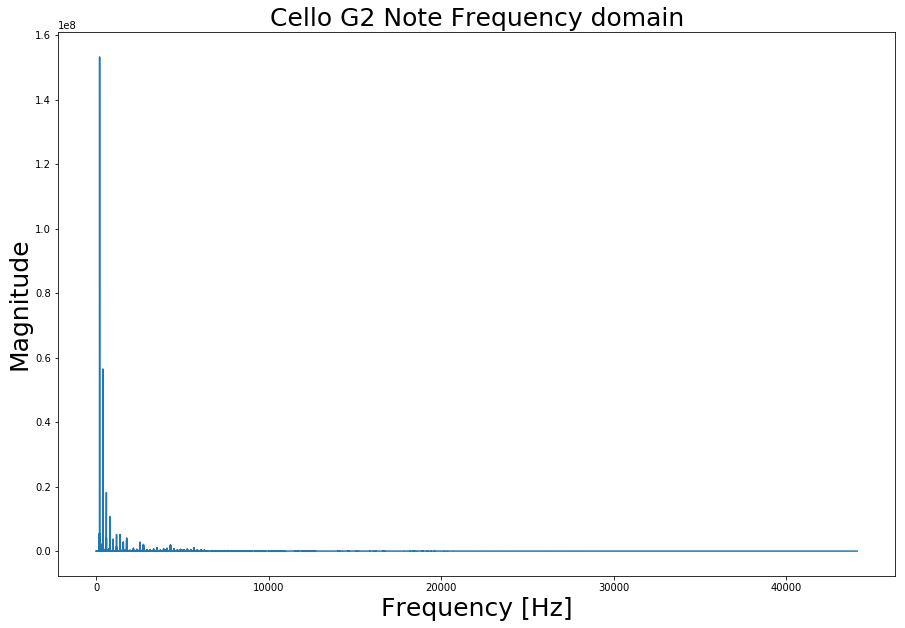

In [2]:
fs, data = wavfile.read('48028__smoseson__g2.wav') # load the data
data = data[:200000,:]
a = data.T[0] # this is a two channel soundtrack, I get the first track
#b=[(ele/2**8.)*2-1 for ele in a] # this is 8-bit track, b is now normalized on [-1,1)
c = rfft(a) # calculate fourier transform (complex numbers list)
plt.figure(figsize = (15,10))
plt.plot(np.linspace(0,fs,len(c)), abs(c))
plt.title('Cello G2 Note Frequency domain', fontsize = 25)
plt.xlabel('Frequency [Hz]', fontsize = 25)
plt.ylabel('Magnitude', fontsize = 25)
plt.show()

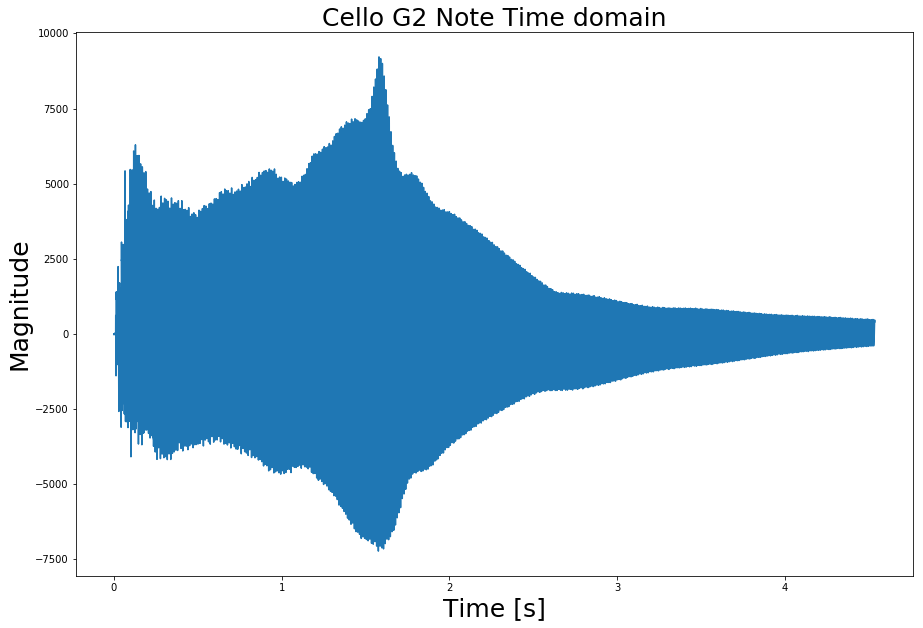

In [3]:
plt.figure(figsize = (15,10))
plt.plot(np.linspace(0,200000/fs, 200000), data.T[0])
plt.title('Cello G2 Note Time domain', fontsize = 25)
plt.xlabel('Time [s]', fontsize = 25)
plt.ylabel('Magnitude', fontsize = 25)
plt.show()

### 1.2 Multiple instruments 

In [4]:
instruments = ['AcousticGuitar_C', 'CathedralOrgan_C', 'Clarinet_C', 'FrenchHorn_C', 'GrandPiano_C', 'Harp_C',
               'RockGuitar_C', 'Saxophone_C']

AcousticGuitar_C


C:\Users\Matthieu\Pictures\Anaconda3_2\lib\site-packages\scipy\io\wavfile.py:273: WavFileWarning: Chunk (non-data) not understood, skipping it.
  WavFileWarning)


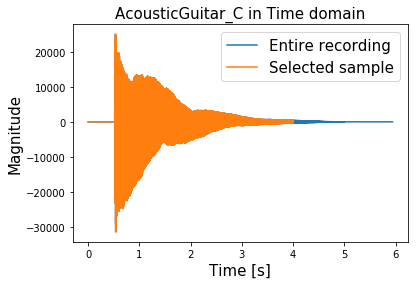

CathedralOrgan_C


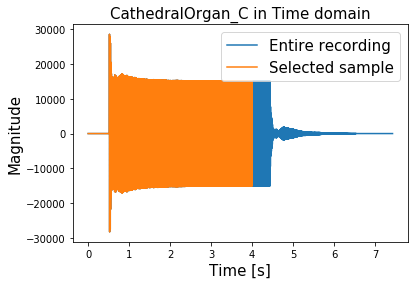

Clarinet_C


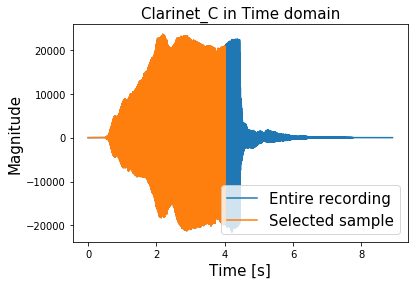

FrenchHorn_C


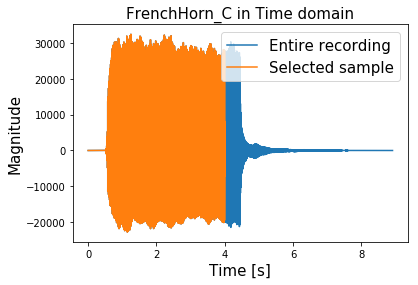

GrandPiano_C


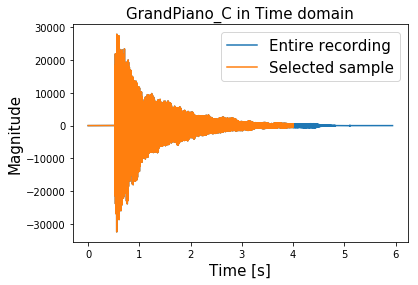

Harp_C


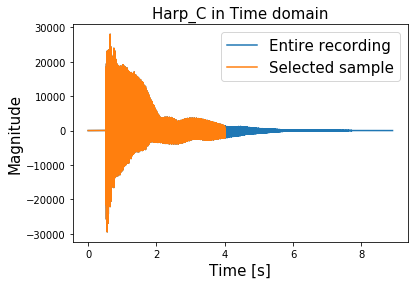

RockGuitar_C


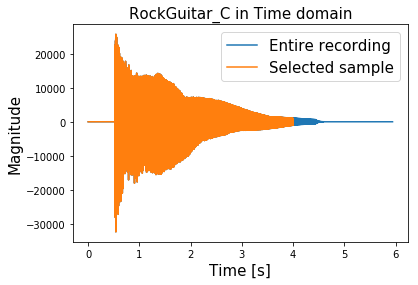

Saxophone_C


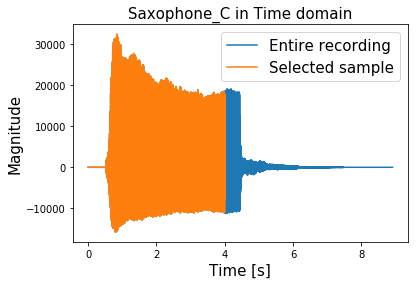

In [5]:
# sampling a representative time frame for each instrument
samples = dict()

# saving the frequencies
freqs = dict()

for instrument in instruments:

    plt.figure()
    print(instrument)
    fs, data = wavfile.read('sounds/'+instrument[:-2]+'.wav') # load the data
    freqs[instrument] = fs

    # sample selected = 1 to 2 sec
    start = 0*fs
    end = 4*fs
    samples[instrument] = data.T[0][start:end]
    t_length = data.shape[0]
    plt.plot(np.linspace(0,t_length/fs, t_length), data.T[0], label = 'Entire recording')
    plt.plot(np.linspace(start/fs, end/fs, (end-start)), samples[instrument], label = 'Selected sample')
    plt.title(instrument + ' in Time domain', fontsize = 15)
    plt.xlabel('Time [s]', fontsize = 15)
    plt.ylabel('Magnitude', fontsize = 15)
    plt.legend(fontsize = 15)
    plt.show()

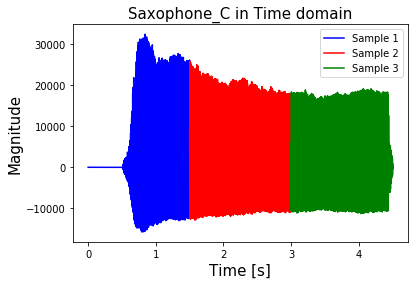

In [6]:
# check influence of different samples

#1
start = 0*fs
end = int(1.5*fs)
sample1 = data.T[0][start:end]
plt.plot(np.linspace(start/fs, end/fs, (end-start)), sample1, label = 'Sample 1', c = 'blue')
start = int(1.5*fs)
end = 3*fs
sample2 = data.T[0][start:end]
plt.plot(np.linspace(start/fs, end/fs, (end-start)), sample2, label = 'Sample 2', c = 'red')
start = 3*fs
end = int(4.5*fs)
sample3 = data.T[0][start:end]
plt.plot(np.linspace(start/fs, end/fs, (end-start)), sample3, label = 'Sample 3', c = 'green')
t_length = data.shape[0]

plt.title(instrument + ' in Time domain', fontsize = 15)
plt.xlabel('Time [s]', fontsize = 15)
plt.ylabel('Magnitude', fontsize = 15)
plt.legend()
plt.show()

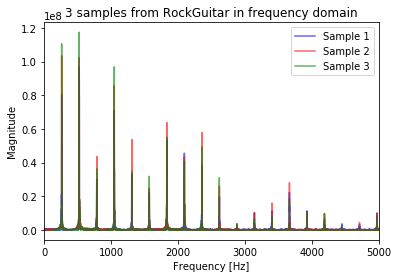

In [7]:
c = rfft(sample1) # calculate fourier transform (complex numbers list)
plt.plot(np.linspace(0,fs, len(c)), abs(c), label = 'Sample 1', c = 'blue', alpha = 0.6) 
c = rfft(sample2) # calculate fourier transform (complex numbers list)
plt.plot(np.linspace(0,fs, len(c)), abs(c), label = 'Sample 2', c = 'red', alpha = 0.6)     
c = rfft(sample3) # calculate fourier transform (complex numbers list)
plt.plot(np.linspace(0,fs, len(c)), abs(c), label = 'Sample 3', c = 'green', alpha = 0.6) 
plt.title('3 samples from RockGuitar in frequency domain')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Magnitude')
plt.legend()
plt.xlim(0,5000)
plt.show()

Guitar&FrenchHorn_C


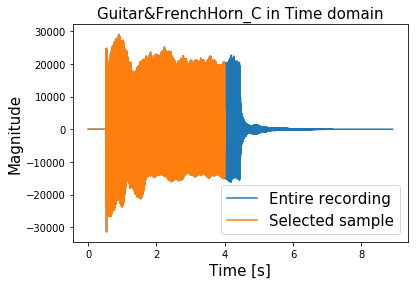

In [8]:
# let's look at multiple instruments

mix_samples = dict()
plt.figure()
instrument = 'Guitar&FrenchHorn_C'
print(instrument)
fs, data = wavfile.read('sounds/'+instrument[:-2]+'.wav') # load the data
freqs[instrument] = fs

# sample selected = 1 to 2 sec
start = 0*fs
end = 4*fs
mix_samples[instrument] = data.T[0][start:end]
t_length = data.shape[0]
plt.plot(np.linspace(0,t_length/fs, t_length), data.T[0], label = 'Entire recording')
plt.plot(np.linspace(start/fs, end/fs, (end-start)), mix_samples[instrument], label = 'Selected sample')
plt.title(instrument + ' in Time domain', fontsize = 15)
plt.xlabel('Time [s]', fontsize = 15)
plt.ylabel('Magnitude', fontsize = 15)
plt.legend(fontsize = 15)
plt.show()

GrandPiano&Clarinet_C


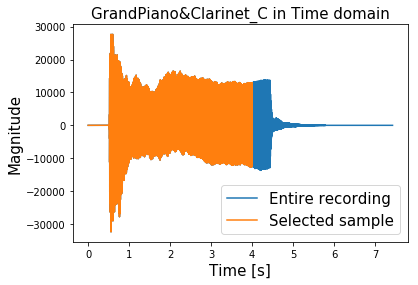

In [9]:
plt.figure()
instrument = 'GrandPiano&Clarinet_C'
print(instrument)
fs, data = wavfile.read('sounds/'+instrument[:-2]+'.wav') # load the data
freqs[instrument] = fs

# sample selected = 1 to 2 sec
start = 0*fs
end = 4*fs
mix_samples[instrument] = data.T[0][start:end]
t_length = data.shape[0]
plt.plot(np.linspace(0,t_length/fs, t_length), data.T[0], label = 'Entire recording')
plt.plot(np.linspace(start/fs, end/fs, (end-start)), mix_samples[instrument], label = 'Selected sample')
plt.title(instrument + ' in Time domain', fontsize = 15)
plt.xlabel('Time [s]', fontsize = 15)
plt.ylabel('Magnitude', fontsize = 15)
plt.legend(fontsize = 15)
plt.show()

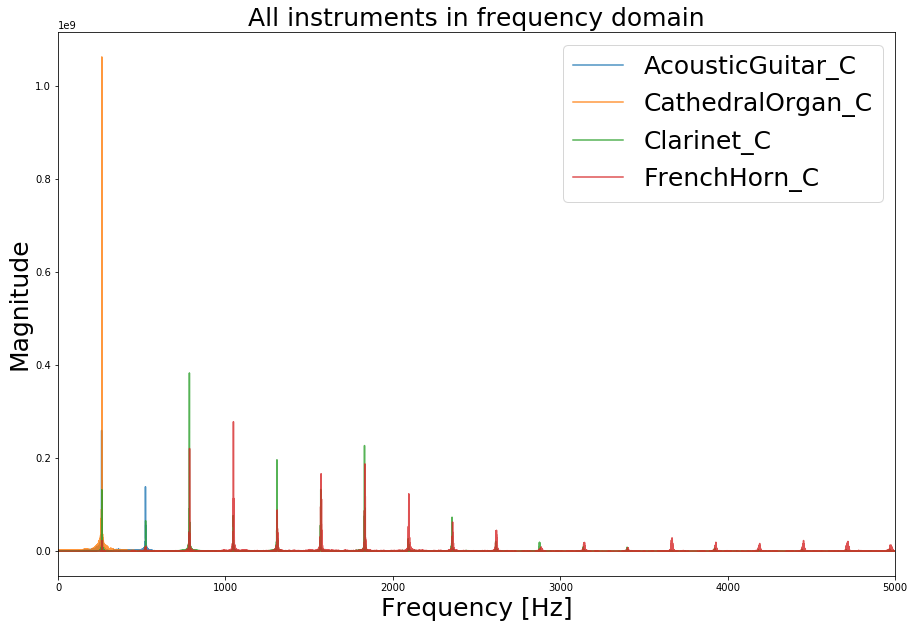

In [10]:
plt.figure(figsize = (15,10))

for instrument in instruments[:4]:
    sample = samples[instrument]
    #b=[(ele/2**8.)*2-1 for ele in sample] # this is 8-bit track, b is now normalized on [-1,1)
    c = rfft(sample) # calculate fourier transform (complex numbers list)
    fs = freqs[instrument]
    plt.plot(np.linspace(0,fs, len(c)), abs(c), label = instrument, alpha = 0.8) 
    
plt.title('All instruments in frequency domain', fontsize = 25)
plt.xlabel('Frequency [Hz]', fontsize = 25)
plt.ylabel('Magnitude', fontsize = 25)
plt.legend(fontsize= 25)
plt.xlim(0,5000)
plt.show()

## Dive into FrenchHorn

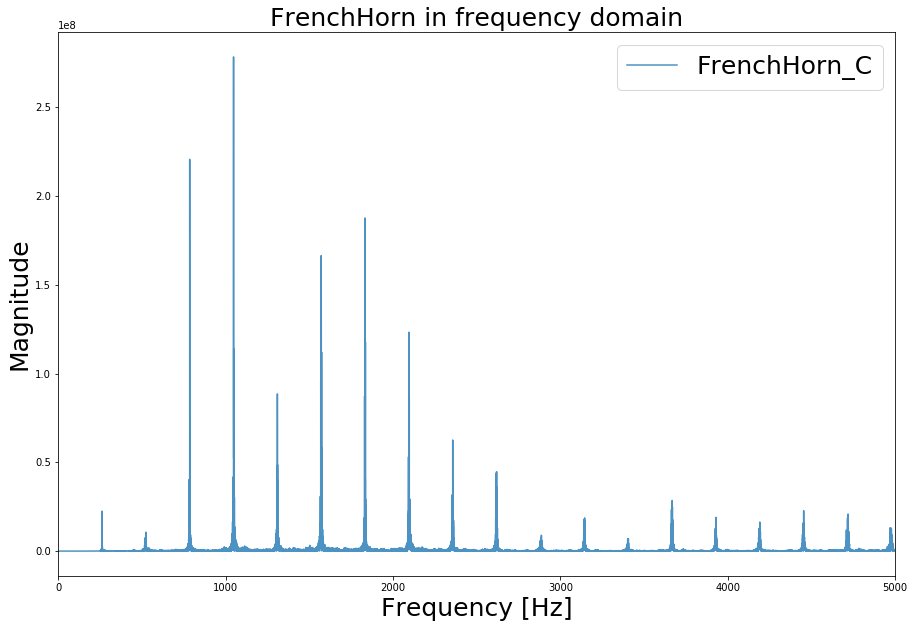

In [11]:
plt.figure(figsize = (15,10))
instrument = 'FrenchHorn_C'
sample = samples[instrument]
c = rfft(sample) # calculate fourier transform (complex numbers list)
fs = freqs[instrument]
plt.plot(np.linspace(0,fs, len(c)), abs(c), label = instrument, alpha = 0.8)     
plt.title('FrenchHorn in frequency domain', fontsize = 25)
plt.xlabel('Frequency [Hz]', fontsize = 25)
plt.ylabel('Magnitude', fontsize = 25)
plt.legend(fontsize= 25)
plt.xlim(0,5000)
plt.show()

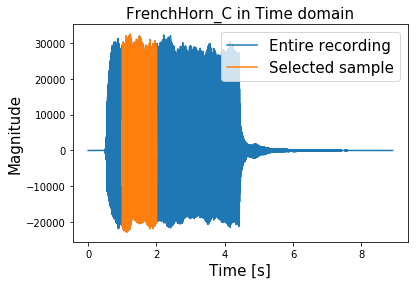

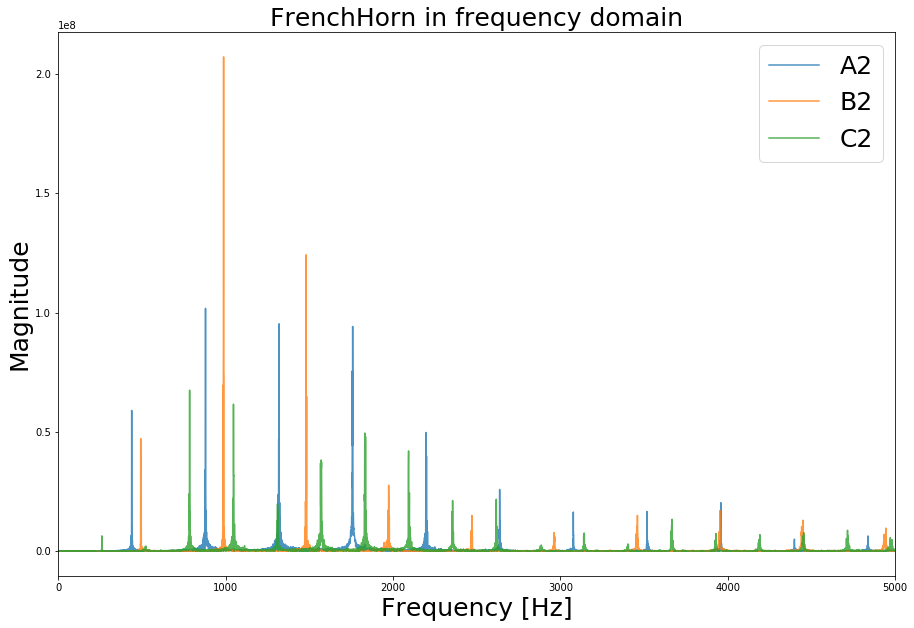

In [12]:
fs, data = wavfile.read('sounds/FrenchHornOctave/A.wav') # load the data
start = 1*fs
end = 2*fs
t_length = data.shape[0]
A2_sample = data.T[0][start:end]
# plt.plot(np.linspace(0,t_length/fs, t_length), data.T[0], label = 'Entire recording')
# plt.plot(np.linspace(start/fs, end/fs, (end-start)), A2_sample, label = 'Selected sample')
# plt.title(instrument + ' in Time domain', fontsize = 15)
# plt.xlabel('Time [s]', fontsize = 15)
# plt.ylabel('Magnitude', fontsize = 15)
# plt.legend(fontsize = 15)
# plt.show()

fs, data = wavfile.read('sounds/FrenchHornOctave/B.wav') # load the data
start = 1*fs
end = 2*fs
t_length = data.shape[0]
B2_sample = data.T[0][start:end]
# plt.figure()
# plt.plot(np.linspace(0,t_length/fs, t_length), data.T[0], label = 'Entire recording')
# plt.plot(np.linspace(start/fs, end/fs, (end-start)), B2_sample, label = 'Selected sample')
# plt.title(instrument + ' in Time domain', fontsize = 15)
# plt.xlabel('Time [s]', fontsize = 15)
# plt.ylabel('Magnitude', fontsize = 15)
# plt.legend(fontsize = 15)
# plt.show()

fs, data = wavfile.read('sounds/FrenchHornOctave/C.wav') # load the data
start = 1*fs
end = 2*fs
t_length = data.shape[0]
C2_sample = data.T[0][start:end]
plt.figure()
plt.plot(np.linspace(0,t_length/fs, t_length), data.T[0], label = 'Entire recording')
plt.plot(np.linspace(start/fs, end/fs, (end-start)), C2_sample, label = 'Selected sample')
plt.title(instrument + ' in Time domain', fontsize = 15)
plt.xlabel('Time [s]', fontsize = 15)
plt.ylabel('Magnitude', fontsize = 15)
plt.legend(fontsize = 15)
plt.show()


plt.figure(figsize = (15,10))
c_A2 = rfft(A2_sample) # calculate fourier transform (complex numbers list)
plt.plot(np.linspace(0,fs, len(c_A2)), abs(c_A2), label = 'A2', alpha = 0.8)   
c_B2 = rfft(B2_sample) # calculate fourier transform (complex numbers list)
plt.plot(np.linspace(0,fs, len(c_B2)), abs(c_B2), label = 'B2', alpha = 0.8)     
c_C2 = rfft(C2_sample) # calculate fourier transform (complex numbers list)
plt.plot(np.linspace(0,fs, len(c_C2)), abs(c_C2), label = 'C2', alpha = 0.8)  
plt.title('FrenchHorn in frequency domain', fontsize = 25)
plt.xlabel('Frequency [Hz]', fontsize = 25)
plt.ylabel('Magnitude', fontsize = 25)
plt.legend(fontsize= 25)
plt.xlim(0,5000)
plt.show()

<Figure size 504x288 with 0 Axes>

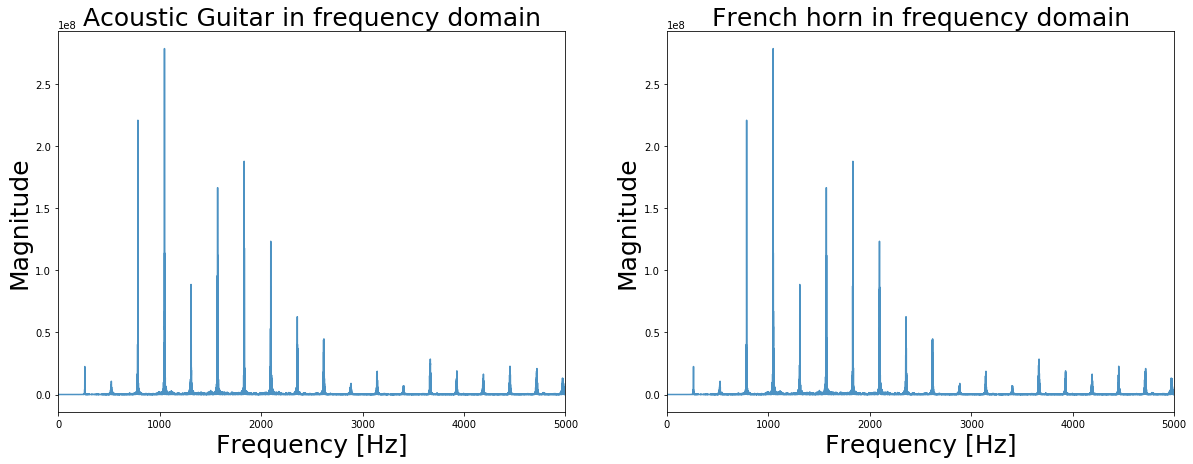

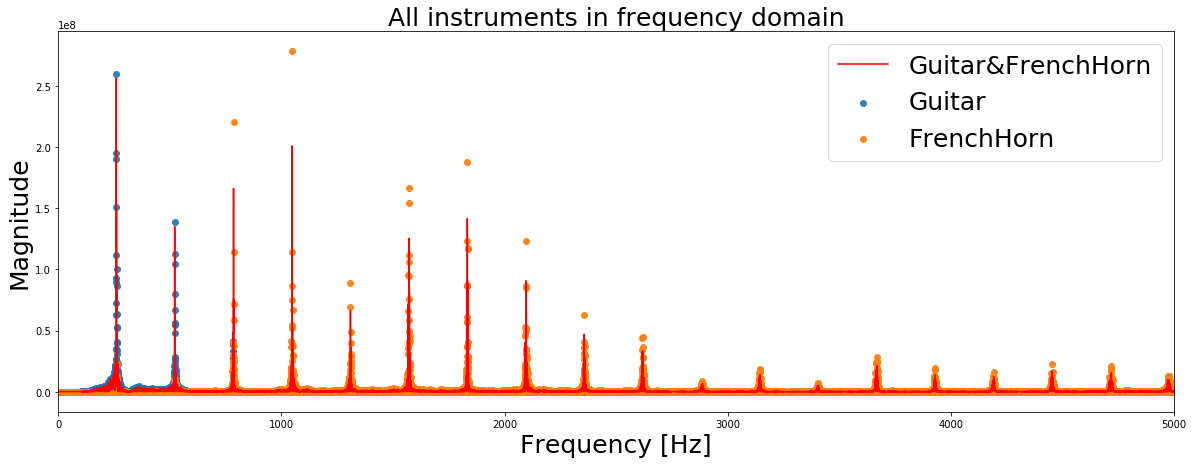

In [13]:
plt.figure(figsize = (7,4))

sample = samples['AcousticGuitar_C']
#b=[(ele/2**8.)*2-1 for ele in sample] # this is 8-bit track, b is now normalized on [-1,1)
c_guit = rfft(sample) # calculate fourier transform (complex numbers list)
fs = freqs['AcousticGuitar_C']

fig, ax = plt.subplots(1,2, figsize=(20,7))
ax[0].plot(np.linspace(0,fs, len(c)), abs(c), alpha = 0.8) 
ax[0].set_title('Acoustic Guitar in frequency domain', fontsize = 25)
ax[0].set_xlabel('Frequency [Hz]', fontsize = 25)
ax[0].set_ylabel('Magnitude', fontsize = 25)
ax[0].set_xlim(0,5000)

sample = samples['FrenchHorn_C']
c_fh = rfft(sample) # calculate fourier transform (complex numbers list)
fs = freqs['FrenchHorn_C']
ax[1].plot(np.linspace(0,fs, len(c)), abs(c), alpha = 0.8) 
    
ax[1].set_title('French horn in frequency domain', fontsize = 25)
ax[1].set_xlabel('Frequency [Hz]', fontsize = 25)
ax[1].set_ylabel('Magnitude', fontsize = 25)
ax[1].set_xlim(0,5000)

fig, ax = plt.subplots(figsize=(20,7))

sample = mix_samples['Guitar&FrenchHorn_C']
c = rfft(sample) # calculate fourier transform (complex numbers list)

ax.plot(np.linspace(0,fs, len(c)), abs(c), c= 'red',label = 'Guitar&FrenchHorn') 
ax.scatter(np.linspace(0,fs, len(c)), abs(c_guit), label = 'Guitar',alpha = 0.9)  
ax.scatter(np.linspace(0,fs, len(c)), abs(c_fh), label = 'FrenchHorn',alpha = 0.9) 
ax.set_title('All instruments in frequency domain', fontsize = 25)
ax.set_xlabel('Frequency [Hz]', fontsize = 25)
ax.set_ylabel('Magnitude', fontsize = 25)
ax.set_xlim(0,5000)
ax.legend(fontsize= 25)

(0, 5000)

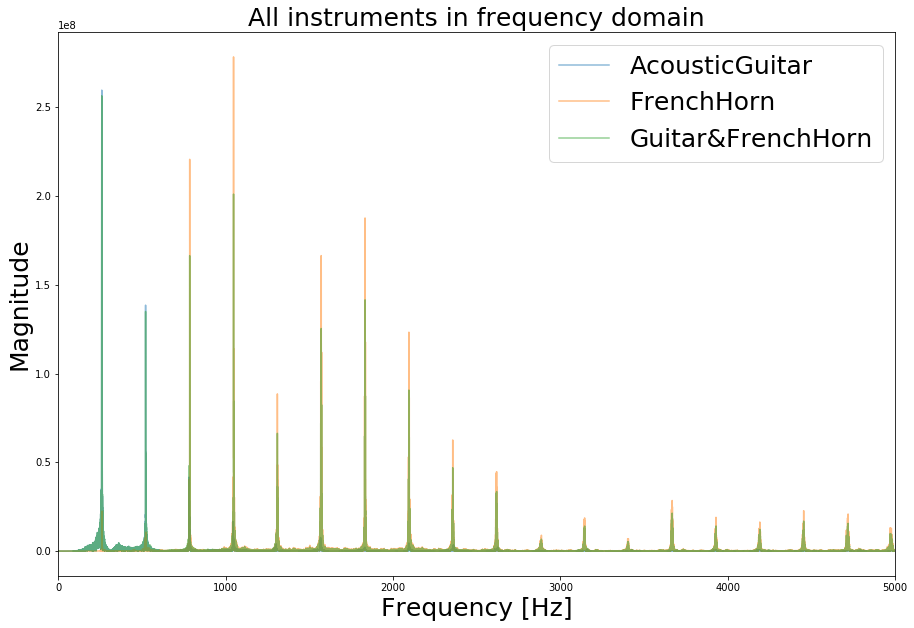

In [14]:
plt.figure(figsize = (15,10))
sample = samples['AcousticGuitar_C']
#b=[(ele/2**8.)*2-1 for ele in sample] # this is 8-bit track, b is now normalized on [-1,1)
c = rfft(sample) # calculate fourier transform (complex numbers list)
fs = freqs['AcousticGuitar_C']

plt.plot(np.linspace(0,fs, len(c)), abs(c), label = 'AcousticGuitar', alpha = 0.5) 

sample = samples['FrenchHorn_C']
#b=[(ele/2**8.)*2-1 for ele in sample] # this is 8-bit track, b is now normalized on [-1,1)
c = rfft(sample) # calculate fourier transform (complex numbers list)
fs = freqs['FrenchHorn_C']
plt.plot(np.linspace(0,fs, len(c)), abs(c), label = 'FrenchHorn', alpha = 0.5) 
    
sample = mix_samples['Guitar&FrenchHorn_C']
#b=[(ele/2**8.)*2-1 for ele in sample] # this is 8-bit track, b is now normalized on [-1,1)
c = rfft(sample) # calculate fourier transform (complex numbers list)


plt.plot(np.linspace(0,fs, len(c)), abs(c), label = 'Guitar&FrenchHorn', alpha = 0.5) 
    
plt.title('All instruments in frequency domain', fontsize = 25)
plt.xlabel('Frequency [Hz]', fontsize = 25)
plt.ylabel('Magnitude', fontsize = 25)
plt.legend(fontsize= 25)
plt.xlim(0,5000)

## 2. Peak Finding Model

In [15]:
def peak_finding(fs, magnitudes, n = 10):
    # find the top freq for each note, lets say higher than 10e7
    threshold = 1e4
    freqs = np.linspace(0,fs, len(magnitudes))
    top_freq = []
    top_magn = []
    for i, magn in enumerate(magnitudes):
        if magn >= threshold:
            freq = freqs[i]
            if len(top_freq) >= 1 and (abs(freq - top_freq[-1])<=30):
                if magn > top_magn[-1]:
                    top_magn[-1] = magn
                    top_freq[-1] = freq
            else:
                top_freq.append(freq)
                top_magn.append(magn)
                
    idx = np.array(top_magn).argsort()[::-1][:n]
    top_freq_sorted = np.array(top_freq)[idx]
    top_magn_sorted = np.array(top_magn)[idx]
    
    # convert back to increasing f
    idx = np.array(top_freq_sorted).argsort()[:n]
    top_freq_sorted = np.array(top_freq_sorted)[idx]
    top_magn_sorted = np.array(top_magn_sorted)[idx]
                               
    return top_freq_sorted, top_magn_sorted

In [16]:
top_freq, top_magn = peak_finding(fs, abs(c))
print(top_freq)

[ 260.25147535  522.0029592   785.50445297 1047.50593824 1309.25742209
 1571.25890736 1833.01039122 2095.01187648 2356.76336034 2619.01484702]


(0, 5000)

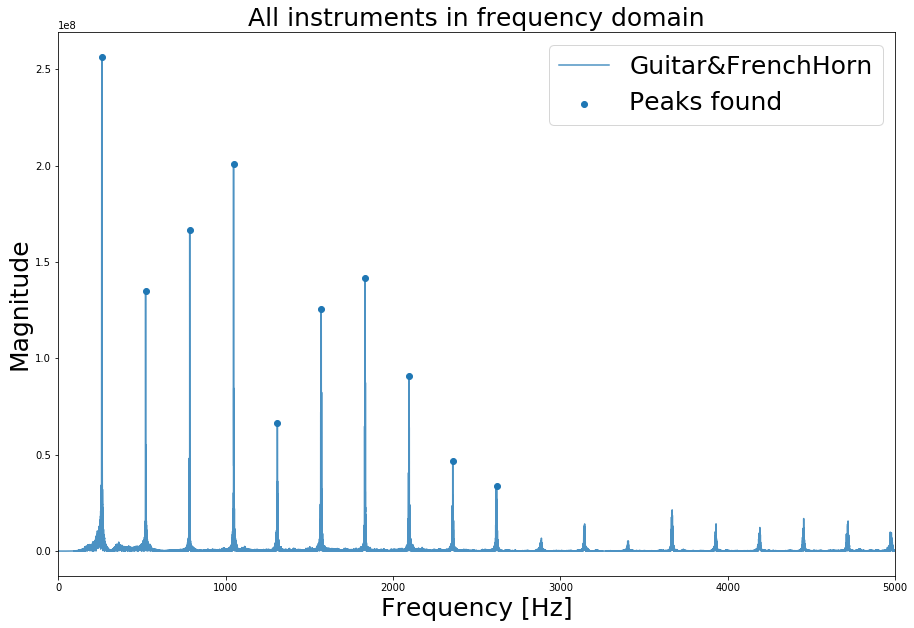

In [17]:
plt.figure(figsize = (15,10))
plt.scatter(top_freq, top_magn, label = 'Peaks found')
plt.plot(np.linspace(0,fs, len(c)), abs(c), label = 'Guitar&FrenchHorn', alpha = 0.8)   
plt.title('All instruments in frequency domain', fontsize = 25)
plt.xlabel('Frequency [Hz]', fontsize = 25)
plt.ylabel('Magnitude', fontsize = 25)
plt.legend(fontsize= 25)
plt.xlim(0,5000)

## Let's find the peak freqs of all instruments

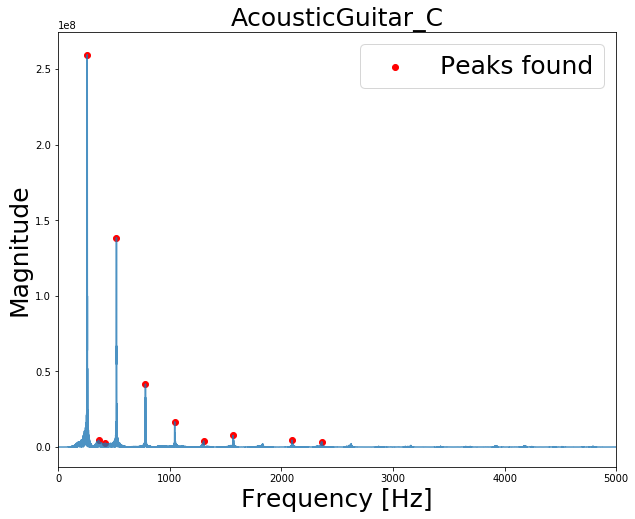

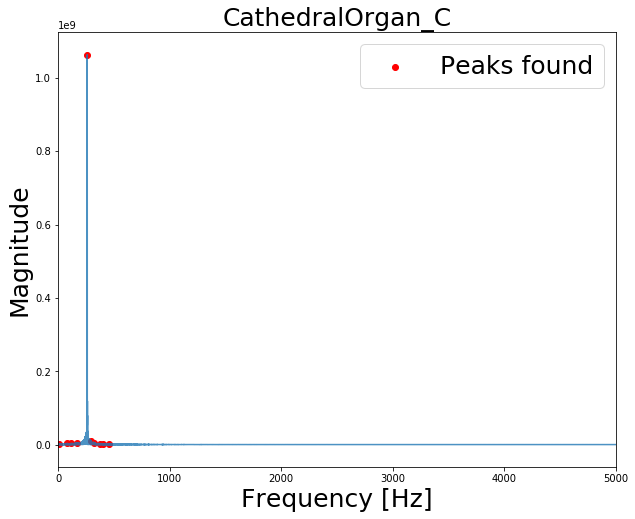

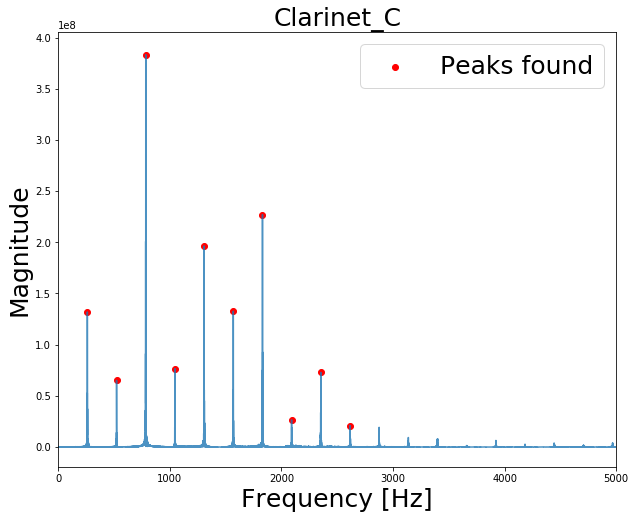

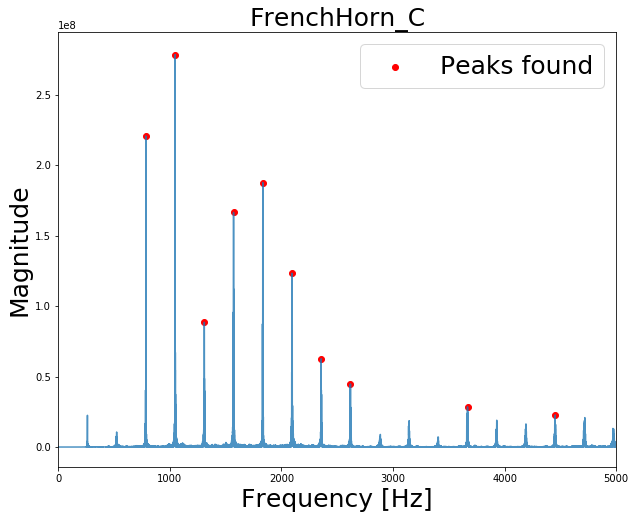

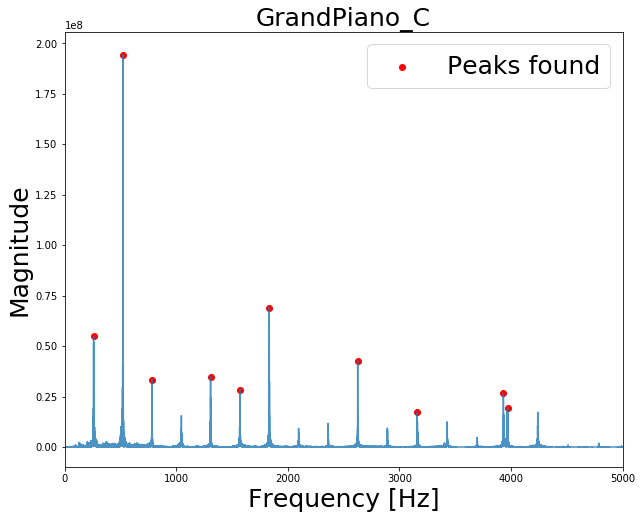

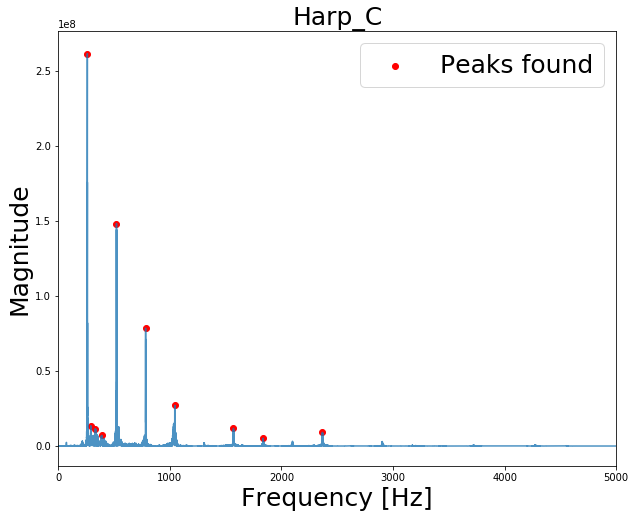

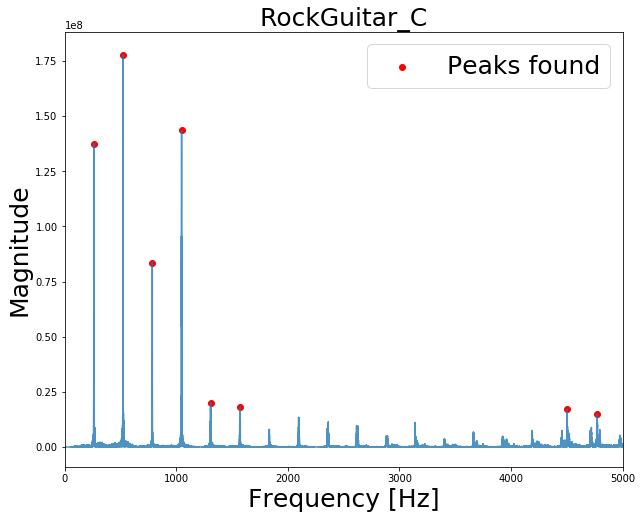

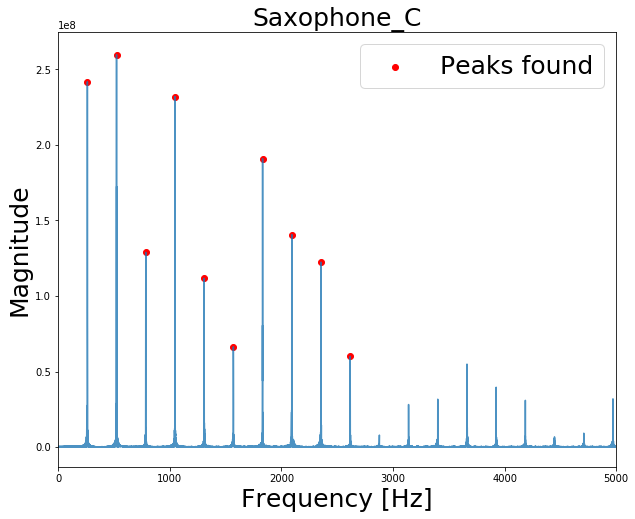

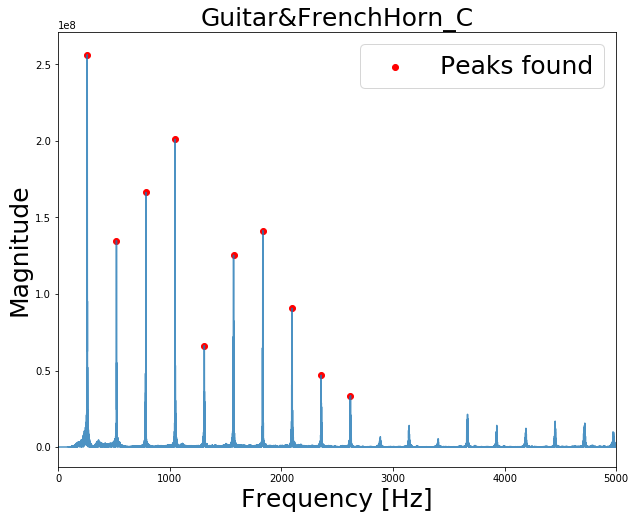

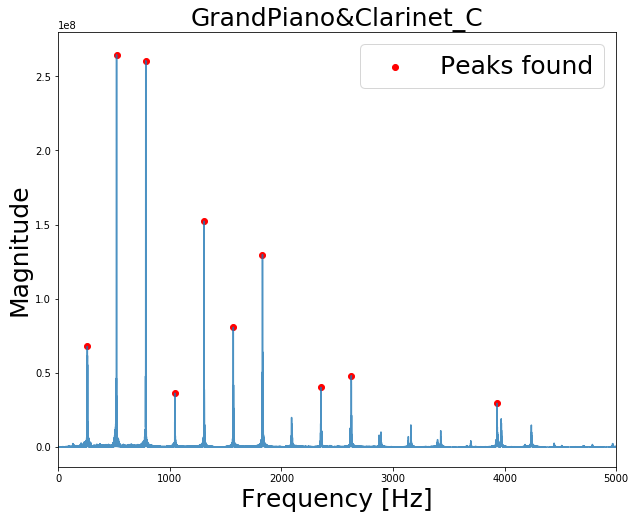

In [19]:
dict_peaks = dict()

for instrument in instruments:
    sample = samples[instrument]
    c = rfft(sample) # calculate fourier transform (complex numbers list)
    fs = freqs[instrument]
    plt.figure(figsize = (10,8))
    plt.plot(np.linspace(0,fs, len(c)), abs(c), alpha = 0.8) 
    top_freq, top_magn = peak_finding(fs, abs(c))
    dict_peaks[instrument] = top_freq
    plt.scatter(top_freq, top_magn, label = 'Peaks found', c = 'red')
    plt.title(instrument, fontsize = 25)
    plt.xlabel('Frequency [Hz]', fontsize = 25)
    plt.ylabel('Magnitude', fontsize = 25)
    plt.legend(fontsize= 25)
    plt.xlim(0,5000)
    plt.show()
    
for instrument in mix_samples.keys():
    sample = mix_samples[instrument]
    c = rfft(sample) # calculate fourier transform (complex numbers list)
    plt.figure(figsize = (10,8))
    plt.plot(np.linspace(0,fs, len(c)), abs(c), alpha = 0.8) 
    top_freq, top_magn = peak_finding(fs, abs(c))
    dict_peaks[instrument] = top_freq
    plt.scatter(top_freq, top_magn, label = 'Peaks found', c = 'red')
    plt.title(instrument, fontsize = 25)
    plt.xlabel('Frequency [Hz]', fontsize = 25)
    plt.ylabel('Magnitude', fontsize = 25)
    plt.legend(fontsize= 25)
    plt.xlim(0,5000)
    plt.show()


In [20]:
# let's now find the peaks of the combo and loop through the instruments
peaks_combo = dict_peaks['Guitar&FrenchHorn_C']
for instrument in instruments:
    peaks = dict_peaks[instrument]
    lst_ones_zeros = np.zeros(len(peaks))
    for i, peak_i in enumerate(peaks):
        for peak_c in peaks_combo:
            if abs(peak_c - peak_i) <= 1:
                lst_ones_zeros[i] = 1
    print('For {}, we found {} peak frequencies in the combo'.format(instrument, np.sum(lst_ones_zeros)))

For AcousticGuitar_C, we found 3.0 peak frequencies in the combo
For CathedralOrgan_C, we found 0.0 peak frequencies in the combo
For Clarinet_C, we found 0.0 peak frequencies in the combo
For FrenchHorn_C, we found 8.0 peak frequencies in the combo
For GrandPiano_C, we found 2.0 peak frequencies in the combo
For Harp_C, we found 2.0 peak frequencies in the combo
For RockGuitar_C, we found 1.0 peak frequencies in the combo
For Saxophone_C, we found 2.0 peak frequencies in the combo


GrandPiano&Clarinet


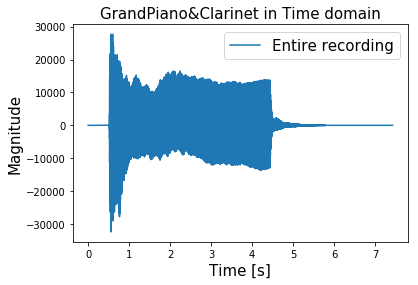

In [23]:
plt.figure()
instrument = 'GrandPiano&Clarinet'
print(instrument)
fs, data = wavfile.read('sounds/'+instrument+'.wav') # load the data
freqs[instrument] = fs

# sample selected = 1 to 2 sec
start = 0*fs
end = 4*fs
samples[instrument] = data.T[0][start:end]
t_length = data.shape[0]
plt.plot(np.linspace(0,t_length/fs, t_length), data.T[0], label = 'Entire recording')
#plt.plot(np.linspace(start/fs, end/fs, (end-start)), samples[instrument], label = 'Selected sample')
plt.title(instrument + ' in Time domain', fontsize = 15)
plt.xlabel('Time [s]', fontsize = 15)
plt.ylabel('Magnitude', fontsize = 15)
plt.legend(fontsize = 15)
plt.show()

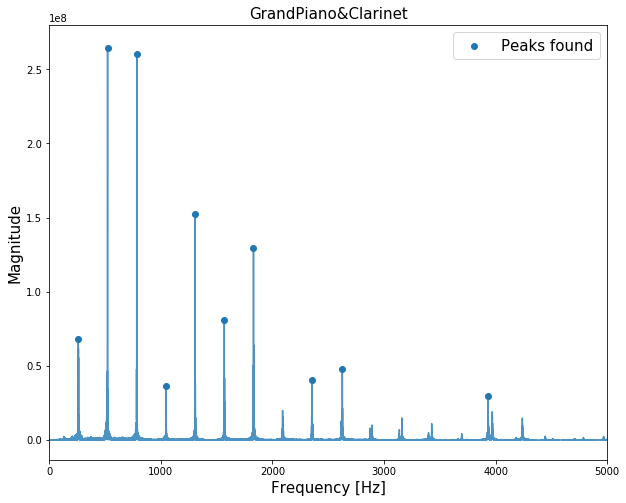

In [24]:
c = rfft(sample) # calculate fourier transform (complex numbers list)
fs = freqs[instrument]
plt.figure(figsize = (10,8))
plt.plot(np.linspace(0,fs, len(c)), abs(c), alpha = 0.8) 
top_freq, top_magn = peak_finding(fs, abs(c))
dict_peaks[instrument] = top_freq
plt.scatter(top_freq, top_magn, label = 'Peaks found')
plt.title(instrument, fontsize = 15)
plt.xlabel('Frequency [Hz]', fontsize = 15)
plt.ylabel('Magnitude', fontsize = 15)
plt.legend(fontsize= 15)
plt.xlim(0,5000)
plt.show()

In [25]:
# let's now find the peaks of the combo and loop through the instruments
peaks_combo = dict_peaks['GrandPiano&Clarinet']
for instrument in instruments[:]:
    peaks = dict_peaks[instrument]
    lst_ones_zeros = np.zeros(len(peaks))
    for i, peak_i in enumerate(peaks):
        for peak_c in peaks_combo:
            if abs(peak_c - peak_i) <= 1:
                lst_ones_zeros[i] = 1
    print('For {}, we found {} peak frequencies in the combo'.format(instrument, np.sum(lst_ones_zeros)))

For AcousticGuitar_C, we found 1.0 peak frequencies in the combo
For CathedralOrgan_C, we found 1.0 peak frequencies in the combo
For Clarinet_C, we found 8.0 peak frequencies in the combo
For FrenchHorn_C, we found 0.0 peak frequencies in the combo
For GrandPiano_C, we found 6.0 peak frequencies in the combo
For Harp_C, we found 2.0 peak frequencies in the combo
For RockGuitar_C, we found 2.0 peak frequencies in the combo
For Saxophone_C, we found 6.0 peak frequencies in the combo


## 3. Linear least squares Model

We now want to formulate the problem as a linear least square problem:

$$Ax = b$$ and $$x = argmin_x (||Ax - b||^2)$$

In [26]:
print(instruments)

['AcousticGuitar_C', 'CathedralOrgan_C', 'Clarinet_C', 'FrenchHorn_C', 'GrandPiano_C', 'Harp_C', 'RockGuitar_C', 'Saxophone_C']


In [35]:
# compute A
A = np.zeros((len(c), len(instruments)))
for i, instrument in enumerate(instruments):
    sample = samples[instrument]
    c = rfft(sample)
    fs = freqs[instrument] 
    A[:,i] = abs(c)    
    
print('A has shape: {}'.format(A.shape))

A has shape: (176400, 8)


In [36]:
# compute b
sample = samples['GrandPiano&Clarinet']
c = rfft(sample) # calculate fourier transform (complex numbers list)
fs = freqs[instrument] 
b = abs(c)
print('b has shape: {}'.format(b.shape))

b has shape: (176400,)


In [39]:
# solve the system
x = np.linalg.lstsq(A,b, rcond = None)[0]
print(x)

[ 0.0174321  -0.0209994   0.49020096 -0.04278293  0.95801986 -0.01027909
 -0.00741543 -0.01227416]


In [40]:
# let's see if it predicts correctly
print(instruments[2])
print(instruments[4])

Clarinet_C
GrandPiano_C


In [42]:
# let's try another sample
sample = mix_samples['Guitar&FrenchHorn_C']
c = rfft(sample) # calculate fourier transform (complex numbers list)
fs = freqs[instrument] 
b = abs(c) 
x = np.linalg.lstsq(A,b, rcond = None)[0]
print(x)

[ 0.96862827  0.01268244 -0.008542    0.71469271  0.02168073 -0.03536389
 -0.03074802  0.00145718]


In [43]:
print(instruments[0])
print(instruments[3])

AcousticGuitar_C
FrenchHorn_C


In [44]:
# let's formalize this approach
def lls_instruments(mix, instruments, n_instr, return_coef = False):
    '''
    Input:
    - mix : sound sample
    - instruments : dictionary of the available data of instruments
    - n_instr : number of instruments expected
                when None, the algorithm will come up with its best guess
    '''
    # convert sound sampel to freq domain
    c_mix = rfft(mix)
    b = abs(c_mix) 
    
    # compose A
    A = np.zeros((len(c_mix), len(instruments)))
    instr_list = []
    for i, instrument in enumerate(instruments):
        instr_list.append(instrument)
        sample = samples[instrument]
        c = rfft(sample) 
        A[:,i] = abs(c)  
        
    x = np.linalg.lstsq(A,b,rcond=None)[0]
    
    # sort from large to small
    idx = x.argsort()[::-1]
    coef_sorted = x[idx]
    instr_sorted = np.array(instr_list)[idx]
    
    if return_coef == True:
        return instr_sorted, coef_sorted
    else:
        return instr_sorted[:n_instr]
    

In [46]:
print(lls_instruments(mix_samples['Guitar&FrenchHorn_C'], instruments, n_instr = 2))
print(lls_instruments(mix_samples['GrandPiano&Clarinet_C'], instruments, n_instr = 2))

['AcousticGuitar_C' 'FrenchHorn_C']
['GrandPiano_C' 'Clarinet_C']


## 4. Sparse Regression Model

If we know that not all features play a role in the model, we can use the mathematics of sparse regression to drive specific coefficients - of non relevant information - to zero. Recall we can write the linear least square problem as:

$$Ax = b$$ and $$x = argmin_x (||Ax - b||^2)$$

For this equation, a closed form solution named the 'normal equations' was available to compute the best x:

$$\hat x = (A A^T)^{-1}A^T b$$

From literature we know that $l_1$ regularization can drive the non-relevant coefficients to zero. Or mathematically, the equation now becomes:

$$x = argmin_x (||Ax - b||^2 + \lambda||x||_1)$$

The inclusion of $\lambda||x||_1$ in the expression to be minimized leads to a penalization of large coefficient values. The larger $\lambda$, the harder this penalization and thus the more the not-contributing feature coefficients will be driven towards zero. Note that this expression is not straight-froward anymore to optimize, as the $l_1$ norm makes it not differentiable. 

The expression can be rewritten as:

$$x = argmin_x (x^Tx - 2x^TA^Tb + b^Tb + \lambda||x||_1)$$

The solution of this corresponds to the one $x$ for which the gradient of the expression between brackets is equal to zero. The gradient of $||x||_1$ is defined at all points except for $x_i = 0$. Therefore, the partial derivatives with respect to $x_i$ can be written as:
  
$$ \left(
  \begin{array}{cccc}
  2x_i - 2A_i^Tb + \lambda <=> x_i > 0 \\
  [-\lambda,\lambda] - 2A_i^Tb <=> x_i = 0 \\
   2x_i - 2A_i^Tb - \lambda <=> x_i < 0 \\
  \end{array}
\right)$$

Note that $[-\lambda, \lambda]$ means that the value can be any value inside the interval. Setting this partial derivative equal to zero, while keeping in mind the constraint on $x_i$, we get the following expression for all $x_i$ values:

$$\left(
  \begin{array}{cccc}
  0 <=> \lambda > 2|A_i^Tb| \\
  A_i^Tb - sign(A_i^Tb)\frac{\lambda}{2} <=> \lambda \leq 2|A_i^Tb|\\
  \end{array}
\right)$$

Intuitively, this makes sense. The value $A_i^Tb$ is related with the correlation of feature i and response variable b. If this correlation is below a certain threshold $\lambda$, its coefficient is set to 0. This sparse regression can now be implemented for our instrument case.

In [47]:
from sklearn.linear_model import LassoCV

# let's formalize this
def lasso_instruments_skl(mix, instruments, n_instr, return_coef = False):
    '''
    Input:
    - mix : sound sample
    - instruments : dictionary of the available data of instruments
    - n_instr : number of instruments expected
                when None, the algorithm will come up with its best guess
    - lam_list : list of regularization params
    '''
    # convert sound sampel to freq domain
    c_mix = rfft(mix)
    b = abs(c_mix) 
    
    # compose A
    A = np.zeros((len(c_mix), len(instruments)))
    instr_list = []
    for i, instrument in enumerate(instruments):
        instr_list.append(instrument)
        sample = samples[instrument]
        c = rfft(sample) 
        A[:,i] = abs(c)  
    
    # run through lambda values until only n_instr 
    model = LassoCV(cv = 3)
    model.fit(A,b)
    coefs = model.coef_
    idx = np.array(coefs).argsort()[::-1]
    coef_sorted = np.array(coefs)[idx]
    instr_sorted = np.array(instr_list)[idx]
    
    if return_coef == True:
        return instr_sorted, coef_sorted 
    else:
        return coef_sorted[:n_instr], instr_sorted[:n_instr]
    


In [48]:
print(lasso_instruments_skl(mix_samples['Guitar&FrenchHorn_C'], instruments, n_instr = 2))
print(lasso_instruments_skl(mix_samples['GrandPiano&Clarinet_C'], instruments, n_instr = 2))

(array([0.8530474 , 0.64991455]), array(['AcousticGuitar_C', 'FrenchHorn_C'], dtype='<U16'))
(array([0.78664833, 0.45110001]), array(['GrandPiano_C', 'Clarinet_C'], dtype='<U16'))


## Add more notes for piano


In [49]:
notes = ['A', 'Asharp','B', 'C','Csharp','D', 'Dsharp','E','F','Fsharp','G','Gsharp']

In [51]:
samples = dict()
instr_c = ['AcousticGuitar_C', 'CathedralOrgan_C', 'Clarinet_C', 'FrenchHorn_C', 'GrandPiano_C', 'Harp_C',
               'RockGuitar_C', 'Saxophone_C']
for instrument in instr_c:
    fs, data = wavfile.read('sounds/'+instrument[:-2]+'.wav') # load the data
    start = 0*fs
    end = 4*fs
    samples[instrument] = data.T[0][start:end]

for note in notes:
    fs, data = wavfile.read('sounds/PianoOctave/'+note+'.wav') # load the data
    start = 0*fs
    end = 4*fs
    samples['GrandPiano_'+ note] = data.T[0][start:end]
    fs, data = wavfile.read('sounds/AcousticGuitarOctave/'+note+'.wav') # load the data
    samples['AcousticGuitar_'+ note] = data.T[0][start:end]
    fs, data = wavfile.read('sounds/FrenchHornOctave/'+note+'.wav') # load the data
    samples['FrenchHorn_'+ note] = data.T[0][start:end]

C:\Users\Matthieu\Pictures\Anaconda3_2\lib\site-packages\scipy\io\wavfile.py:273: WavFileWarning: Chunk (non-data) not understood, skipping it.
  WavFileWarning)


In [52]:
fs, data = wavfile.read('sounds/GuitarFrenchHornPiano'+'.wav')
mix_samples['GuitarFrenchHornPiano'] = data.T[0][start:end]
fs, data = wavfile.read('sounds/AcousticGuitarDFrenchHornFSharpGrandPianoA.wav')
mix_samples['AcousticGuitarDFrenchHornFSharpGrandPianoA'] = data.T[0][start:end]
fs, data = wavfile.read('sounds/Youtube/Mary-FH-MjpAvGl_xM0.wav')
mix_samples['Mary_FrenchHorn'] = data[start:end]
fs, data = wavfile.read('sounds/Youtube/Mary-cD6sq7TjZAw.wav')
mix_samples['Mary_piano'] = data.T[0][start:end]
fs, data = wavfile.read('sounds/2Guitar2FrenchHorn2GrandPiano.wav')
mix_samples['Mixof6'] = data.T[0][start:end]
mix_samples.keys()

dict_keys(['Guitar&FrenchHorn_C', 'GrandPiano&Clarinet_C', 'GuitarFrenchHornPiano', 'AcousticGuitarDFrenchHornFSharpGrandPianoA', 'Mary_FrenchHorn', 'Mary_piano', 'Mixof6'])

In [53]:
samples.keys()

dict_keys(['AcousticGuitar_C', 'CathedralOrgan_C', 'Clarinet_C', 'FrenchHorn_C', 'GrandPiano_C', 'Harp_C', 'RockGuitar_C', 'Saxophone_C', 'GrandPiano_A', 'AcousticGuitar_A', 'FrenchHorn_A', 'GrandPiano_Asharp', 'AcousticGuitar_Asharp', 'FrenchHorn_Asharp', 'GrandPiano_B', 'AcousticGuitar_B', 'FrenchHorn_B', 'GrandPiano_Csharp', 'AcousticGuitar_Csharp', 'FrenchHorn_Csharp', 'GrandPiano_D', 'AcousticGuitar_D', 'FrenchHorn_D', 'GrandPiano_Dsharp', 'AcousticGuitar_Dsharp', 'FrenchHorn_Dsharp', 'GrandPiano_E', 'AcousticGuitar_E', 'FrenchHorn_E', 'GrandPiano_F', 'AcousticGuitar_F', 'FrenchHorn_F', 'GrandPiano_Fsharp', 'AcousticGuitar_Fsharp', 'FrenchHorn_Fsharp', 'GrandPiano_G', 'AcousticGuitar_G', 'FrenchHorn_G', 'GrandPiano_Gsharp', 'AcousticGuitar_Gsharp', 'FrenchHorn_Gsharp'])

In [54]:
print(lls_instruments(mix_samples['Guitar&FrenchHorn_C'], samples.keys(), n_instr = 2))
print(lasso_instruments_skl(mix_samples['Guitar&FrenchHorn_C'], samples.keys(), n_instr = 2))

['AcousticGuitar_C' 'FrenchHorn_C']
(array([0.74302396, 0.54665561]), array(['AcousticGuitar_C', 'FrenchHorn_C'], dtype='<U21'))


In [55]:
print(lls_instruments(mix_samples['GrandPiano&Clarinet_C'], samples.keys(), n_instr = 2))
print(lasso_instruments_skl(mix_samples['GrandPiano&Clarinet_C'], samples.keys(), n_instr = 2))

['Clarinet_C' 'GrandPiano_C']
(array([0.5169564 , 0.22847113]), array(['Clarinet_C', 'GrandPiano_C'], dtype='<U21'))


In [56]:
print(lls_instruments(mix_samples['GuitarFrenchHornPiano'], samples.keys(), n_instr = 3))
print(lasso_instruments_skl(mix_samples['GuitarFrenchHornPiano'], samples.keys(), n_instr = 3))

['GrandPiano_G' 'AcousticGuitar_Csharp' 'FrenchHorn_E']
(array([0.46713801, 0.42970508, 0.36608022]), array(['GrandPiano_G', 'FrenchHorn_E', 'AcousticGuitar_Csharp'],
      dtype='<U21'))


In [57]:
print(lls_instruments(mix_samples['AcousticGuitarDFrenchHornFSharpGrandPianoA'], samples.keys(), n_instr = 3))
print(lasso_instruments_skl(mix_samples['AcousticGuitarDFrenchHornFSharpGrandPianoA'], samples.keys(), n_instr = 3))

['GrandPiano_A' 'AcousticGuitar_D' 'FrenchHorn_Fsharp']
(array([0.61894003, 0.47049882, 0.27581609]), array(['GrandPiano_A', 'AcousticGuitar_D', 'FrenchHorn_Fsharp'],
      dtype='<U21'))


In [58]:
instr_sorted_ll, coef_sorted_ll = lls_instruments(mix_samples['Mixof6'], samples.keys(), n_instr = 6, return_coef = True)
instr_sorted_lasso, coef_sorted_lasso = lasso_instruments_skl(mix_samples['Mixof6'], samples.keys(), n_instr = 6, return_coef = True)

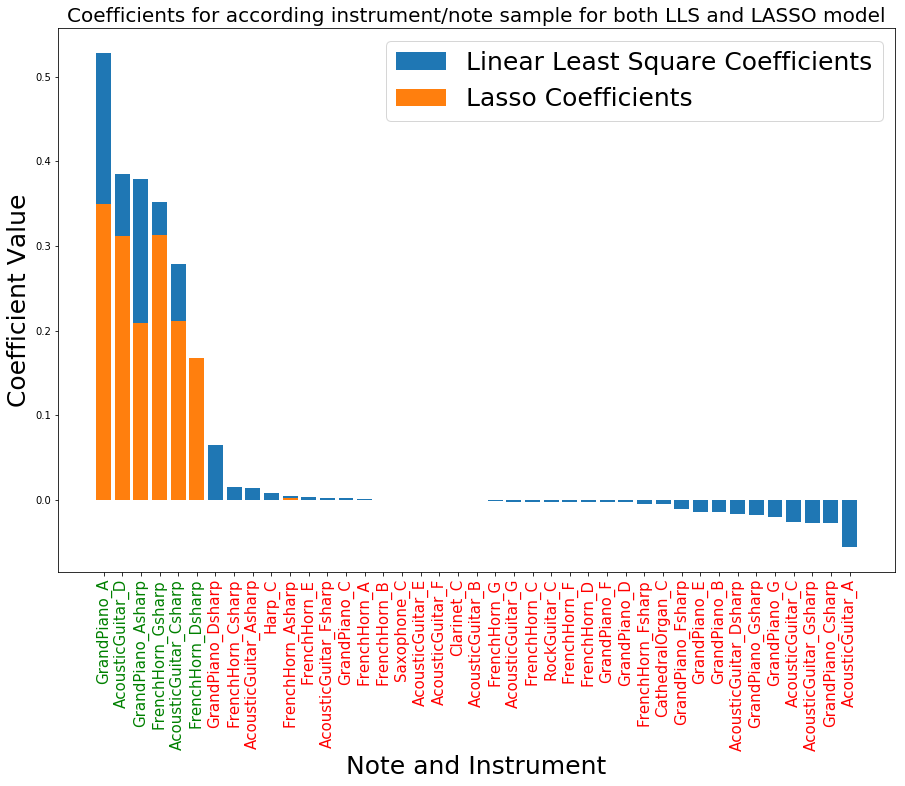

In [59]:
# create one nice plot of the coefficients
# make dict of coefs
coef_ll = dict()
coef_lasso = dict()
for i, instr_ll in enumerate(instr_sorted_ll):
    coef_ll[instr_ll] = coef_sorted_ll[i]

for i, instr_lasso in enumerate(instr_sorted_lasso):
    coef_lasso[instr_lasso] = coef_sorted_lasso[i] 
    
# get the colors
my_colors = []
for i in range(len(instr_sorted_lasso)):
    if i < 6:
        my_colors.append('g')
    else:
        my_colors.append('r')
    
plt.figure(figsize = (15,10))
instrs = coef_ll.keys()
coefs_ll_list = [coef_ll[k] for k in instrs]
coefs_lasso_list = [coef_lasso[k] for k in instrs]
plt.bar(instrs, coefs_ll_list, label = 'Linear Least Square Coefficients')
plt.bar(instrs, coefs_lasso_list, label = 'Lasso Coefficients')
plt.xticks(list(instrs),list(instrs), rotation='vertical', fontsize = 15)
plt.xlabel('Note and Instrument', fontsize = 25)
plt.ylabel('Coefficient Value', fontsize = 25)
plt.title('Coefficients for according instrument/note sample for both LLS and LASSO model', fontsize = 20)
plt.legend(fontsize = 25)
for ticklabel, tickcolor in zip(plt.gca().get_xticklabels(), my_colors):
    ticklabel.set_color(tickcolor)
plt.show()

## 5. Testing to real world data

In [60]:
# real world 
# we expect French Horn C, D and E
print(lls_instruments(mix_samples['Mary_FrenchHorn'], samples.keys(), n_instr = 4))
print(lasso_instruments_skl(mix_samples['Mary_FrenchHorn'], samples.keys(), n_instr = 4))

['GrandPiano_D' 'FrenchHorn_D' 'GrandPiano_G' 'GrandPiano_C']
(array([0.34626176, 0.32173365, 0.24069142, 0.19240348]), array(['GrandPiano_D', 'FrenchHorn_D', 'GrandPiano_G', 'GrandPiano_C'],
      dtype='<U21'))


In [62]:
# we expect the piano D, C, H-sharp and F
print(lls_instruments(mix_samples['Mary_piano'], samples.keys(), n_instr = 3))
print(lasso_instruments_skl(mix_samples['Mary_piano'], samples.keys(), n_instr = 3))

['GrandPiano_D' 'GrandPiano_E' 'Harp_C']
(array([0.13463647, 0.09313905, 0.06991269]), array(['GrandPiano_D', 'GrandPiano_E', 'Harp_C'], dtype='<U21'))


## 6. Principle Component Analysis

In [63]:
from sklearn.decomposition import PCA

In [64]:
# compose A
options = samples.keys()
half = int(len(c))
A = np.zeros((half, len(options)))
for i, instrument in enumerate(options):
    sample = samples[instrument]
    c = rfft(sample) 
    half = int(len(c))
    A[:,i] = abs(c[:half])

mean = A.mean(axis = 1)
print(A.shape)

for i in range(A.shape[1]):
    A[:,i] = A[:,i] - mean

(176400, 41)


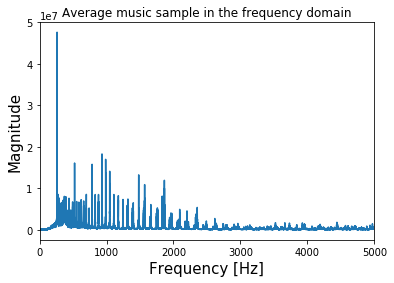

In [65]:
plt.figure()
plt.plot(np.linspace(0,fs,A.shape[0]), mean)
plt.xlabel('Frequency [Hz]', fontsize = 15)
plt.ylabel('Magnitude', fontsize = 15)
plt.title('Average music sample in the frequency domain', fontsize = 12)
plt.xlim(0,5000)
plt.show()

In [67]:
PCA_ = PCA().fit(A)

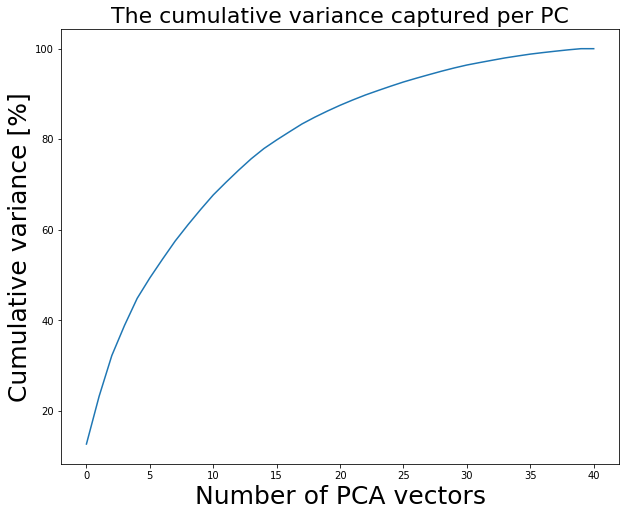

In [70]:
var_per_comp = PCA_.explained_variance_ratio_
cum_var = 100*np.array([sum(var_per_comp[:k+1]) for k in range(len(var_per_comp))])

plt.figure(figsize = (10, 8))
plt.plot(range(len(var_per_comp)), cum_var)
plt.title('The cumulative variance captured per PC', fontsize = 22)
plt.xlabel('Number of PCA vectors', fontsize = 25)
plt.ylabel('Cumulative variance [%]', fontsize = 25)
plt.show()

In [71]:
PCA_trans = PCA_.transform(A)
PCA_trans.shape

(176400, 41)

In [72]:
samples.keys()

dict_keys(['AcousticGuitar_C', 'CathedralOrgan_C', 'Clarinet_C', 'FrenchHorn_C', 'GrandPiano_C', 'Harp_C', 'RockGuitar_C', 'Saxophone_C', 'GrandPiano_A', 'AcousticGuitar_A', 'FrenchHorn_A', 'GrandPiano_Asharp', 'AcousticGuitar_Asharp', 'FrenchHorn_Asharp', 'GrandPiano_B', 'AcousticGuitar_B', 'FrenchHorn_B', 'GrandPiano_Csharp', 'AcousticGuitar_Csharp', 'FrenchHorn_Csharp', 'GrandPiano_D', 'AcousticGuitar_D', 'FrenchHorn_D', 'GrandPiano_Dsharp', 'AcousticGuitar_Dsharp', 'FrenchHorn_Dsharp', 'GrandPiano_E', 'AcousticGuitar_E', 'FrenchHorn_E', 'GrandPiano_F', 'AcousticGuitar_F', 'FrenchHorn_F', 'GrandPiano_Fsharp', 'AcousticGuitar_Fsharp', 'FrenchHorn_Fsharp', 'GrandPiano_G', 'AcousticGuitar_G', 'FrenchHorn_G', 'GrandPiano_Gsharp', 'AcousticGuitar_Gsharp', 'FrenchHorn_Gsharp'])

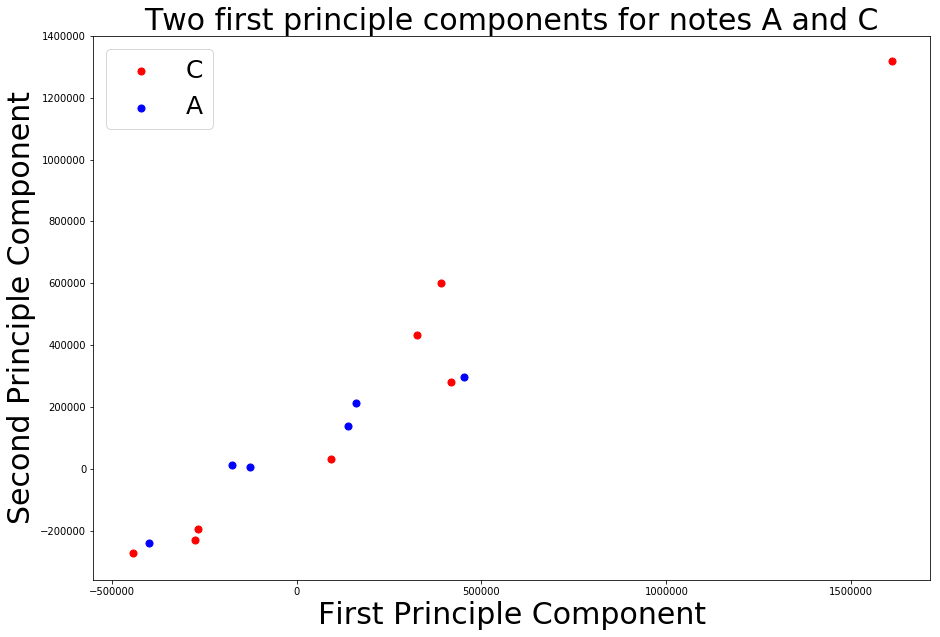

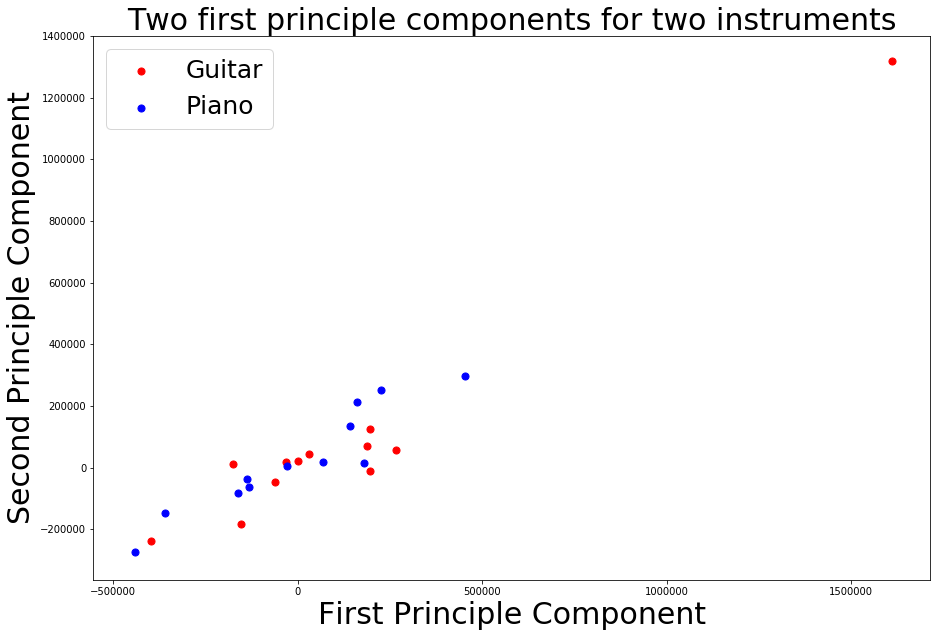

In [74]:
# scatter two instruments and two notes in space defined by two PC's
Cs = list(samples.keys())[:8]
As = list(samples.keys())[8:14]
idx_guit = [0,9,12,15,18,21,24,27,30,33,36,39]
idx_piano = [4,8,11,14,17,20,23,26,29,32,35,38]

plt.figure(figsize = (15, 10))
for i in range(8):
    if i == 0:
        plt.scatter(PCA_trans[0,i], PCA_trans[1,i], label = 'C', c = 'red', alpha = 1, s= 50)
    else:
        plt.scatter(PCA_trans[0,i], PCA_trans[1,i], c = 'red', alpha = 1, s= 50)
for i in range(8,14):
    if i == 8:
        plt.scatter(PCA_trans[0,i], PCA_trans[1,i], label = 'A', c = 'blue',alpha = 1, s = 50)
    else:
        plt.scatter(PCA_trans[0,i], PCA_trans[1,i], c = 'blue',alpha = 1, s = 50)

plt.title('Two first principle components for notes A and C', fontsize = 30)
plt.xlabel('First Principle Component', fontsize = 30)
plt.ylabel('Second Principle Component', fontsize = 30)
plt.legend(fontsize=25)
plt.show()

plt.figure(figsize = (15, 10))
for i in idx_guit:
    if i == 0:
        plt.scatter(PCA_trans[0,i], PCA_trans[1,i], label = 'Guitar', c = 'red', alpha = 1, s= 50)
    else:
        plt.scatter(PCA_trans[0,i], PCA_trans[1,i], c = 'red', alpha = 1, s= 50)
for i in idx_piano:
    if i == 8:
        plt.scatter(PCA_trans[0,i], PCA_trans[1,i], label = 'Piano', c = 'blue',alpha = 1, s = 50)
    else:
        plt.scatter(PCA_trans[0,i], PCA_trans[1,i], c = 'blue',alpha = 1, s = 50)

plt.title('Two first principle components for two instruments', fontsize = 30)
plt.xlabel('First Principle Component', fontsize = 30)
plt.ylabel('Second Principle Component', fontsize = 30)
plt.legend(fontsize=25)
plt.show()

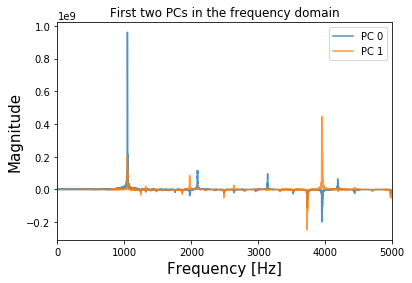

In [76]:
# plot the two first PC's
plt.figure()
for i in range(2):
    plt.plot(PCA_trans[:,i], alpha = 0.8, label = 'PC {}'.format(i))
plt.xlim(0,5000)
plt.xlabel('Frequency [Hz]', fontsize = 15)
plt.ylabel('Magnitude', fontsize = 15)
plt.title('First two PCs in the frequency domain', fontsize = 12)
plt.legend()
plt.xlim(0,5000)
plt.show()